# Visualizacion Grafica de Valores Faltantes

## Librerias

In [1]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import upsetplot

## Cargar Funciones desde otro Notebook

In [2]:
%run funtions_graphics.ipynb

## Cargar Datos

In [3]:
datos = pd.read_csv('./data/riskfactors.csv')

In [4]:
riskfactors_df = pd.DataFrame(datos)

In [5]:
riskfactors_df

,index,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,...,No,NaN,NaN,NaN,1095.0,261.0,104.0,156.0,521.0,12.0
1,1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,...,No,NaN,NaN,NaN,52.0,209.0,52.0,0.0,52.0,0.0
2,2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,...,No,NaN,NaN,NaN,36.0,156.0,52.0,24.0,24.0,24.0
3,3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,...,Yes,Everyday,Yes,NaN,-7.0,261.0,209.0,261.0,365.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,10,Female,79,144.0,63.0,25.56,Widowed,NaN,0,...,No,NaN,NaN,NaN,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0
241,241,46,Male,45,170.0,74.0,21.87,Divorced,NaN,2,...,No,NaN,NaN,NaN,52.0,52.0,52.0,24.0,52.0,24.0
242,242,15,Male,62,175.0,71.0,24.46,Divorced,NaN,0,...,Yes,Not@All,NaN,7.0,365.0,156.0,104.0,52.0,730.0,365.0
243,243,34,Female,62,138.0,64.0,23.74,Married,NaN,0,...,Yes,Everyday,No,NaN,730.0,0.0,24.0,156.0,104.0,0.0


## Configuracion general de las graficas

In [6]:
%matplotlib inline

# tamaño de los graficos
sns.set(
    rc={
        'figure.figsize':(8, 8)
    }
)

# estilo de los graficos
sns.set_style('whitegrid')

## Grafico de Paleta

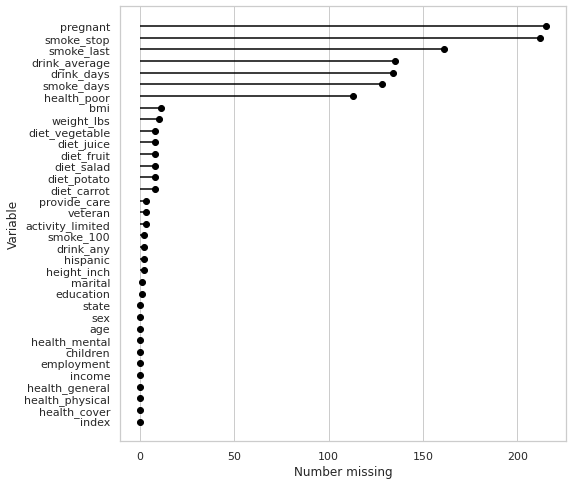

In [7]:
riskfactors_df.missing.missing_variable_plot()

Muestra las variables mediante lineas cuya longitud representa la cantidad de valores faltantes

## Histograma

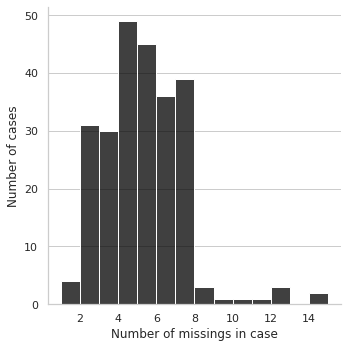

In [8]:
riskfactors_df.missing.missing_case_plot()

Muestra un histograma con el numero de valores faltantes y la cantidad de observaciones que corresponde a cada numero

## Grafico de barra de Valores Faltantes en una variable para bloques consecutivos de 10 observaciones

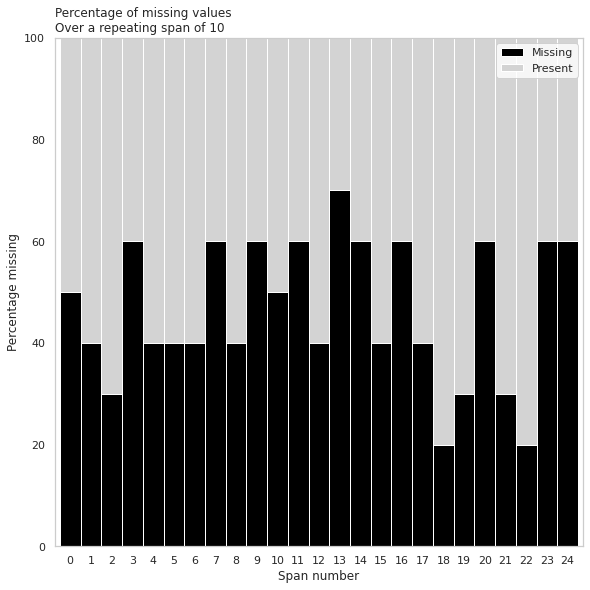

In [9]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable='health_poor',
        span_every=10,
        rot=0
    )
)

Muestra el porcentaje de valores faltantes contenido en una variable en cada 10 observaciones consecutivas

## Grafico de barra de Valores Faltantes para todas las variables

<AxesSubplot:>

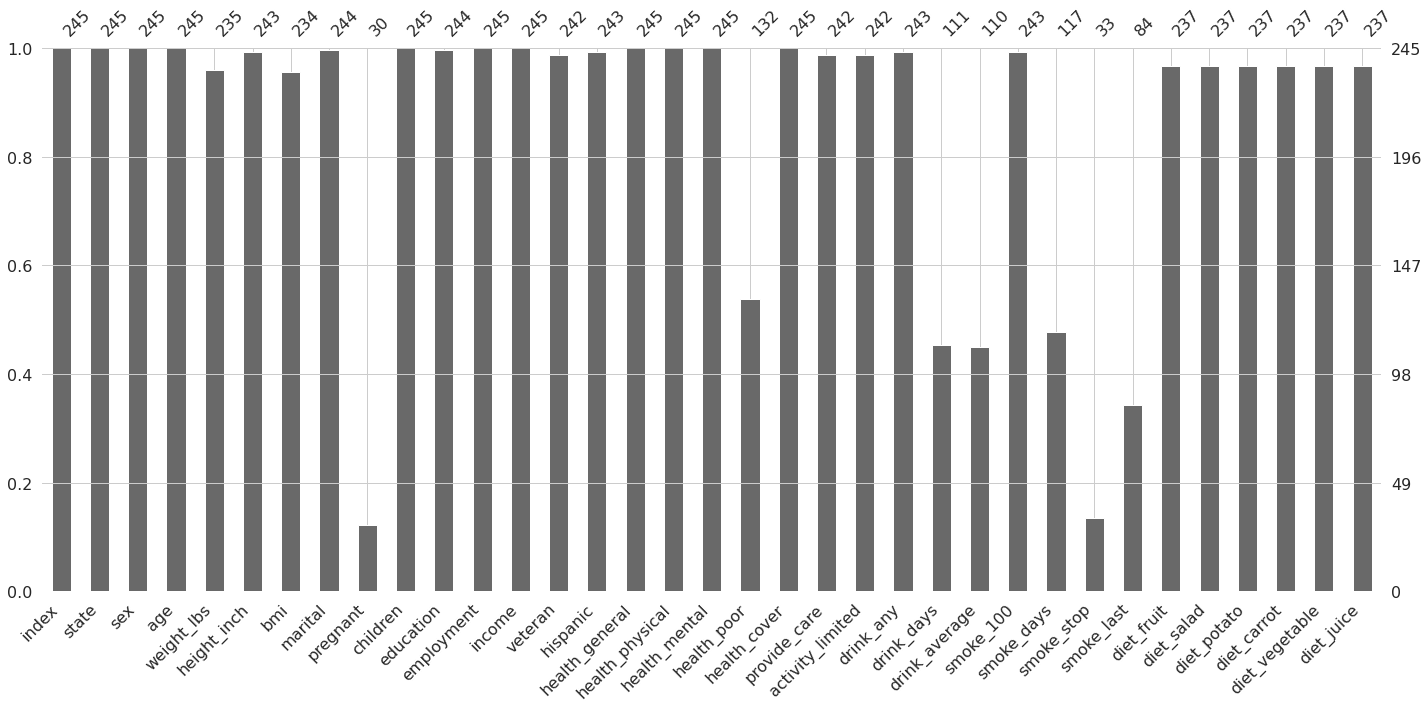

In [10]:
missingno.bar(df=riskfactors_df)

Los espacios en blanco de las barras en esta grafica representan los valores faltantes 

## Matriz de Valores Faltantes de todas las variables

<AxesSubplot:>

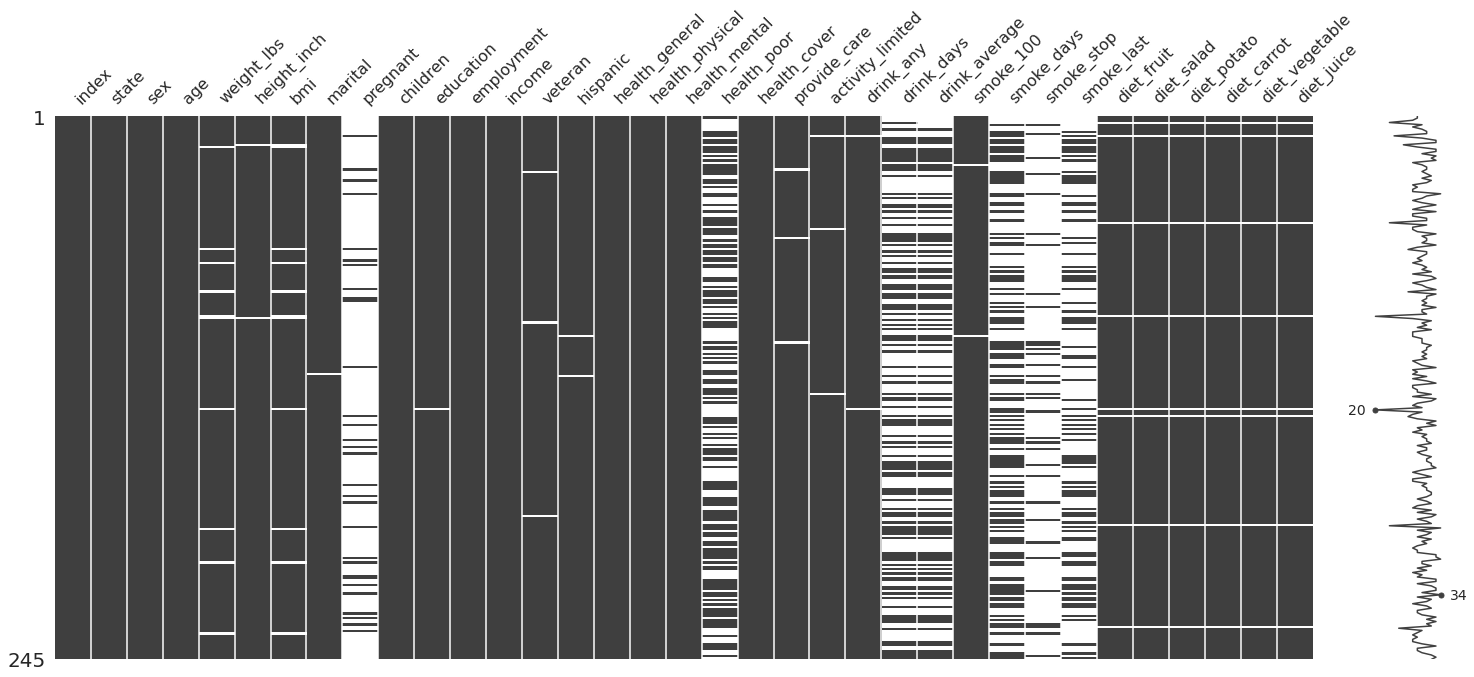

In [11]:
missingno.matrix(df=riskfactors_df)

Los espacios en blanco representan los valores faltantes. Este tipo de visualizacion permite observar relaciones entre variables.

## Grafico Upsetplot

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

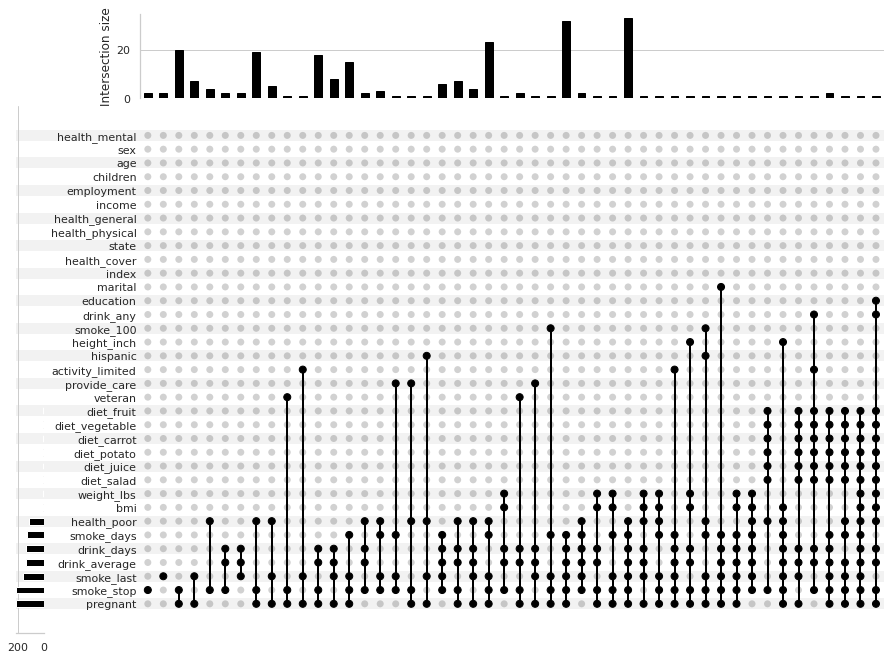

In [12]:
# para todas las variables
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables=None,
        element_size=20
    )
)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

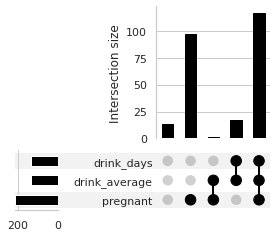

In [13]:
# para un conjunto de variables
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables=['pregnant', 'drink_days', 'drink_average'],
        element_size=30
    )
)

Nos muestra la relacion entre valores faltantes de diferentes variables